In [15]:
pip install onnx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [17]:
pip install numba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install numba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from numba import cuda
print(cuda.detect())

Found 1 CUDA devices
id 0      b'NVIDIA T400 4GB'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-f748cbed-5ce7-bff1-bd01-ea1a21a5bf6f
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
True


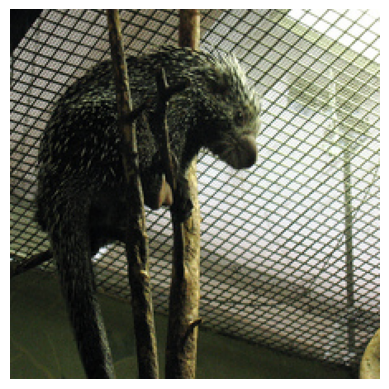

class=n02346627 porcupine, hedgehog ; probability=0.663425
class=n02490219 marmoset ; probability=0.140330
class=n02356798 fox squirrel, eastern fox squirrel, Sciurus niger ; probability=0.108320
class=n02493509 titi, titi monkey ; probability=0.022912
class=n01622779 great grey owl, great gray owl, Strix nebulosa ; probability=0.008134


In [32]:
# 📦 Install Required Packages
!pip install -q onnx onnxruntime matplotlib numpy pillow requests

# 📚 Import Libraries
import onnx
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os

# 🖼️ Download and Load Test Image
img_url = 'https://s3.amazonaws.com/model-server/inputs/kitten.jpg'
img_path = 'ILSVRC2012_test_00000032 (1) (1).jpeg'

if not os.path.exists(img_path):
    with open(img_path, 'wb') as f:
        f.write(requests.get(img_url).content)

# 🔠 Download and Load ImageNet Labels
labels_url = 'https://s3.amazonaws.com/onnx-model-zoo/synset.txt'
labels_path = 'synset.txt'

if not os.path.exists(labels_path):
    with open(labels_path, 'wb') as f:
        f.write(requests.get(labels_url).content)

with open(labels_path, 'r') as f:
    labels = [line.strip() for line in f.readlines()]

# 🧼 Image Preprocessing (Resizing, Normalizing, NCHW Format)
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((256, 256))
    img = img.crop((16, 16, 240, 240))  # Center crop to 224x224

    img_np = np.array(img).astype(np.float32) / 255.0
    img_np = (img_np - [0.485, 0.456, 0.406]) / [0.229, 0.224, 0.225]
    img_np = np.transpose(img_np, (2, 0, 1))  # HWC to CHW
    img_np = np.expand_dims(img_np, axis=0)  # Add batch dimension
    return img_np.astype(np.float32)  # 🔥 This line ensures correct type


# 🧠 Load ONNX Model
onnx_model_path = 'vgg16-12-int8.onnx'  # Change to your model file if needed
session = ort.InferenceSession(onnx_model_path)

# 🧾 Get Input and Output Names
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# 🔍 Run Inference
def predict(img_path):
    img = preprocess_image(img_path)
    
    # Run inference
    outputs = session.run([output_name], {input_name: img})[0]
    
    # Softmax
    probs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)
    top5_idx = np.argsort(probs[0])[::-1][:5]
    
    # Display image
    plt.imshow(Image.open(img_path))
    plt.axis('off')
    plt.show()

    # Print top-5 predictions
    for i in top5_idx:
        print(f"class={labels[i]} ; probability={probs[0][i]:.6f}")

# 🚀 Run Prediction
predict('ILSVRC2012_test_00000032 (1) (1).jpeg')
